<a href="https://colab.research.google.com/github/Yeaaaaaaah/streamlit/blob/main/%EC%B0%B8%EA%B3%A0%EC%9A%A9%20%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EC%BD%94%EB%93%9C/%EC%8B%9C%EA%B0%81%ED%99%94%20%EC%B0%B8%EA%B3%A0%EC%9A%A9%20%EC%BD%94%EB%93%9C5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1 #
!pip install plotly -q # -q : 메시지 없이 설치할 수 있는 옵션
!pip install pywaffle -q
!pip install folium -q
import folium # 지도 관련
from folium import Marker
from folium import plugins
from folium import GeoJson
import plotly.graph_objects as go

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from pywaffle import Waffle

In [ ]:
# 2 #
# 1. 나눔폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 2. 런타임 재시작 -> 런타임 / 런타임 다시 시작 (Ctrl + M .) 


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (8,172 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128276 files and di

In [ ]:
# 3 #
plt.rc('font', family='NanumBarunGothic') 

<img src = "https://drive.google.com/uc?id=1ogdjmqiB3tXEk3lKX6taiN5h8hHLmu4T">

## 유튜브 보지 말라는 내용을 유튜브로 보고 있는 나


In [ ]:
# 4 자료 불러오기#
#스마트폰 사용 실태조사
smartphone = pd.read_csv("https://raw.githubusercontent.com/hiid0726/read_books/main/data/2021_smartphone_20220509.csv", 
 encoding = 'cp949')#cp949

#국민 독서 실태 조사
reading = pd.read_csv("https://raw.githubusercontent.com/hiid0726/read_books/main/data/reding_books2020.csv", 
 encoding = 'UTF-8')#cp949

#여가활동 조사
play_2019 = pd.read_csv("https://raw.githubusercontent.com/hiid0726/read_books/main/data/playing_2019.csv", 
 encoding = 'UTF-8')#cp949
play_2020 = pd.read_csv("https://raw.githubusercontent.com/hiid0726/read_books/main/data/playing_2020.csv", 
 encoding = 'UTF-8')#cp949
play_2021 = pd.read_csv("https://raw.githubusercontent.com/hiid0726/read_books/main/data/playing_2021.csv", 
 encoding = 'UTF-8')#cp949

#연간독서량
read_count = pd.read_csv("https://raw.githubusercontent.com/hiid0726/read_books/main/data/year_reading_count_202008.csv", 
 encoding = 'UTF-8')#cp949

#연간독서율
read_rate = pd.read_csv("https://raw.githubusercontent.com/hiid0726/read_books/main/data/year_reading_rate_202008.csv", 
 encoding = 'UTF-8')#cp949

#전국 지점
bookstore = pd.read_csv("https://raw.githubusercontent.com/hiid0726/read_books/main/data/bookstore_2022.csv", 
 encoding = 'UTF-8')#cp949

# #서울_독서실태조사
# bookstore = pd.read_excel("https://github.com/hiid0726/read_books/blob/main/data/seoul_reading.xlsx", 
#  encoding = 'UTF-8')#cp949

<ipython-input-3-10ddc33ad64e>:3: DtypeWarning: Columns (122,134,143,166,208,210,224,228) have mixed types. Specify dtype option on import or set low_memory=False.
  smartphone = pd.read_csv("https://raw.githubusercontent.com/hiid0726/read_books/main/data/2021_smartphone_20220509.csv",


In [ ]:
# 5 여가활동조사 연도 지정 #
play_2019.insert(1,'year','2019')
play_2020.insert(1,'year','2020')
play_2021.insert(1,'year','2021')

In [ ]:
smartphone1 = smartphone[['AGE','Q1A8','Q1B1','Q1B2','Q1B3','Q1B4','Q1B5','Q1B6','Q1B7','Q1B8','Q1B9','Q1B10','Q1B12','Q1B13',
'Q1B14','Q1B15','Q1B16','Q1B17','Q1B18','Q1B19','Q1B20','Q1B21','Q1B22','Q1B23','Q1B24','Q1B25','Q2A2','Q5','Q5A','Q5B','Q5C1',
'Q5C2'
]]
smartphone1.index
smartphone1['Q5A'].value_counts().sort_index() #5.스마트폰 온라인 동영상 서비스 이용 빈도
#1 매일
#2 일주일에 5~6일
#3 일주일에 3~4일
#4 일주일에 1~2일
#5 한달에 1~3일
#6 2~3달에 1~2일 이하
smartphone1['Q5B'].value_counts().sort_index()#5-2.1일 기준으로 평균적인 이용시간
#1 10분 미만
#2 10분 이상~30분 미만
#3 30분 이상~1시간 미만
#4 1시간 이상~2시간 미만
#5 2시간 이상~6시간 미만
#6 6시간 이상
smartphone1['Q1B8'].value_counts().sort_index()#스마트폰 이용현황_이용정도(영화, tv, 동영상)
#  ~7(매우자주이용한다.)


columns = ["number","동영상서비스이용빈도", "평균이용시간"]
index = [1, 2, 3, 4, 5, 6]
phone = pd.DataFrame({
    "number" : (1,2,3,4,5,6),
    "동영상서비스이용빈도": list(smartphone1['Q5A'].value_counts().sort_index().values),
    "평균이용시간": list(smartphone1['Q5B'].value_counts().sort_index().values),
    # "이용정도": list(smartphone1['Q1B8'].value_counts().sort_index().values)
    }
    , index = index, columns = columns
    
)



In [ ]:
## 동영상 서비스 이용빈도 & 평균 이용시간
phone

,number,동영상서비스이용빈도,평균이용시간
1,1,9850,994
2,2,5824,5514
3,3,4820,8231
4,4,2418,6064
5,5,521,2522
6,6,65,173


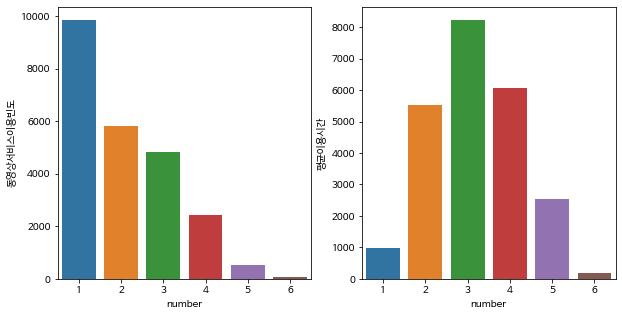

In [ ]:
# 스마트폰 이용시 동영상 서비스 이용빈도, 평균 이용시간 
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.barplot(x='number',y='동영상서비스이용빈도',data=phone) 
#1 매일
#2 일주일에 5~6일
#3 일주일에 3~4일
#4 일주일에 1~2일
#5 한달에 1~3일
#6 2~3달에 1~2일 이하

plt.subplot(122)
sns.barplot(x='number',y='평균이용시간',data=phone) 
#1 10분 미만
#2 10분 이상~30분 미만
#3 30분 이상~1시간 미만
#4 1시간 이상~2시간 미만
#5 2시간 이상~6시간 미만
#6 6시간 이상
plt.show()

In [ ]:
read_rate

,ANALS_TRGET_YEAR,ANALS_TRGET_MT,AREA_NM,AGE_VALUE,SEXDSTN_VALUE,LON_MBER_CO,ALL_MBER_CO,READ_RT_VALUE
0,2019,1,강원도,영유아(0-5),남자,240,13208,1.817
1,2019,1,강원도,영유아(0-5),여자,189,11776,1.605
2,2019,1,강원도,유아(6-7),남자,282,20572,1.371
3,2019,1,강원도,유아(6-7),여자,273,23480,1.163
4,2019,1,강원도,초등(8-13),남자,1606,145153,1.106
...,...,...,...,...,...,...,...,...
5809,2020,7,충청북도,40대,여자,4106,727317,0.565
5810,2020,7,충청북도,50대,남자,930,274350,0.339
5811,2020,7,충청북도,50대,여자,1145,339220,0.338
5812,2020,7,충청북도,60대이상,남자,716,125650,0.570


<AxesSubplot:xlabel='AREA_NM', ylabel='READ_RT_VALUE'>

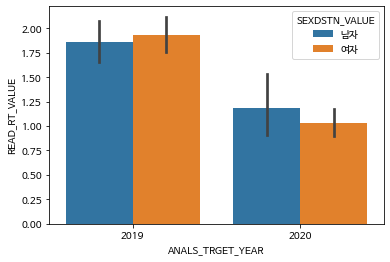

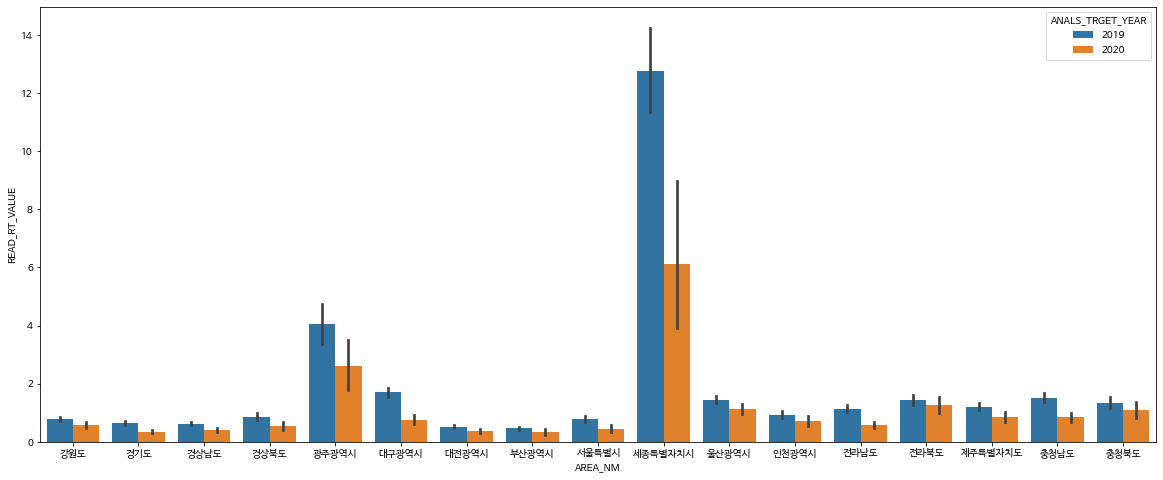

In [ ]:
# 남여, 연도별 독서율 (2019~2020)

sns.barplot(x='ANALS_TRGET_YEAR',y='READ_RT_VALUE',data=read_rate,
            hue = 'SEXDSTN_VALUE') 
plt.figure(figsize=(20,8))

# 지역별, 연도별 독서율 (2019~2020)
sns.barplot(x='AREA_NM',y='READ_RT_VALUE',data=read_rate,
            hue = 'ANALS_TRGET_YEAR') 

In [ ]:
bookstore

In [ ]:
# 지역 구분을 위한 json 파일 불러오기
!wget https://github.com/bigdata-young/230207_viz_practice/raw/main/Seoul_Gu.json # 다운받는 코드
geo="Seoul_Gu.json" 

#서점 행정구 별 분포도
bookstore_m = bookstore.groupby('SIGNGU_NM').agg({
    'LC_LA': 'mean',
    'LC_LO': 'mean',
    'POI_NM': 'count',

})
# 기본 지도 생성
m = folium.Map(location=[37.468656, 126.886638], zoom_start=8, width='%100', height='%100',
               tiles='Cartodb Positron')

locations = bookstore_m[['LC_LA', 'LC_LO']].values.tolist()
for i in range(len(locations)):
  row = bookstore_m.iloc[i] 
  folium.CircleMarker(location=locations[i],
                     radius=float(row['POI_NM']/5), 
                     fill_color='green',
                      color = 'green',
                      ).add_to(m)

m

--2023-03-16 16:44:48--  https://github.com/bigdata-young/230207_viz_practice/raw/main/Seoul_Gu.json
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bigdata-young/230207_viz_practice/main/Seoul_Gu.json [following]
--2023-03-16 16:44:48--  https://raw.githubusercontent.com/bigdata-young/230207_viz_practice/main/Seoul_Gu.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29564 (29K) [text/plain]
Saving to: ‘Seoul_Gu.json.21’

Seoul_Gu.json.21    100%[===================>]  28.87K  --.-KB/s    in 0.002s  

2023-03-16 16:44:48 (13.9 MB/s) - ‘Seoul_Gu.json.21’ saved [29564/29564]



## 책을 읽으면 좋은점
<img src = "https://drive.google.com/uc?id=1J23gHOTFdNWoL2viIVV97IGZrRxpOs_B">